In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install igraph gravis  --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 41.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os
from PIL import Image
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


# Data Processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IOT_White_Labeling/Amazon/data/amazon_smart_cameras_products_dataset.csv')
# df = df[df['brand']!="None"]

In [ ]:
df.columns

Index(['id', 'name', 'brand', 'short_description', 'long_description',
       'image_url', 'url'],
      dtype='object')

##Extract App Names

### NER

In [ ]:
# nltk.data.path.append(r".\tokenizers")
nltk.download('punkt')
#load the model
# nlp = spacy.load(r"C:\Users\moink\Downloads\white_label\model-best")
nlp = spacy.load(r"/content/drive/MyDrive/NET_SEC_WHITE_LABEL/NER/case_sensitive_ner")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.6.1 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
import string
from collections import defaultdict
import re

def get_all_contexts(text, target_word, context_size=5):
    # Tokenize the text
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]
    # Find all occurrences of the target word

    target_indices = [i for i, token in enumerate(tokens) if token.lower() == target_word.lower()]

    # Extract context sentences for each occurrence of the target word
    all_contexts = []
    for target_index in target_indices:
        start_index = max(0, target_index - context_size)
        end_index = min(len(tokens), target_index + context_size + 1)
        context_words = tokens[start_index:end_index]
        context_sentence = ' '.join(context_words)
        all_contexts.append(context_sentence)

    return all_contexts

def get_app_name(nlp, text):

    contexts = get_all_contexts(text, "app")

    app_name = defaultdict(int)

    for context in contexts:
        doc = nlp(context)

        #iterate through the entities
        for ent in doc.ents:
            name = re.sub("[^a-zA-Z0-9]", "", ent.text.upper())
            app_name[name]  +=1

    # return app_name if app_name else None
    return max(app_name, key=app_name.get) if app_name else None


for index, row in df.iterrows():
#download punkt using nltk.download('punkt') and provide the path below

    description_list = [row['long_description'] , row['short_description']]



    app_name = None
    row['app_name'] = None
    for description in description_list:

        if description:
            app_name = get_app_name(nlp, description.replace("\n", " "))

    df.at[index, 'app_name'] = app_name
    print(df.at[index, 'app_name'])


nan
nan
nan
BLINK
None
None
None
ALEXA
OWLTRON
None
WYZE
None
WANSVIEW
None
None
BLINK
None
None
LAVIEW
None
None
None
ESEECLOUD
ZOSISMART
None
ESCEECLOUD
None
AMOROM
SIREN
WYZE
None
None
PANOOB
None
None
None
None
None
None
None
None
None
PANOX
None
IP
CLOUDEDGE
None
None
None
None
ALARMIN
None
SYMYNELEC
ALEXA
None
None
None
ARLO
HIK
None
ALEXA
None
None
QUICKLYTHIS
None
None
EUFYSECURITY
None
None
ALEXA
None
OSAIO
SMARTLIFE
None
None
None
None
None
None
None
None
None
IEGEEK
None
None
None
None
ZOSISMART
ARLO
None
SYMYNELEC
ALARMIN
VIEWLINK
None
None
THEN
None
ESEECLOUD
None
WYZE
None
None
SIREN
VICOHOME
None
None
None
TUYA
None
LAVIEW
LAVIEW
AMCREST
None
None
VICOHOME
None
OWLTRON
BOTSLAB
None
None
None
None
None
None
ESCEECLOUD
WYZE
BLURAMS
None
None
ONVIF
None
KAMPRO
PETCUBE
None
LAVIEW
AMCREST
None
None
ESEECLOUD
None
None
LITTLELFSMART
ZOSISMART
None
IEGEEK
CLOUDEDGE
None
24H
None
GEENI
None
None
None
None
ZOSISMART
None
None
None
ALFREDCAMERA
None
None
None
WYZE
None
CAMHIPRO
C

In [ ]:
df['app_name'].isna().sum()

110

LOREX, ALFREDCAMERA,KAMPRO

In [ ]:
df[(df['app_name'].notnull()) & (df['app_name']=='24H')]

id                                          name    brand  \
147  B0CNGKVXRR  Rraycom Security Detection Monitor Assistant  Rraycom   

                                     short_description  \
147  2.4G/ WIFI 6 Dual Band&2K High DefinitionThis ...   

                                      long_description  \
147   24/7 Peace of Mind 4MP QHD 360 Auto Tracking ...   

                                             image_url  \
147  https://m.media-amazon.com/images/I/61LSqwVU39...   

                                                   url app_name  
147  https://www.amazon.com/Rraycom-Security-Detect...      24H

In [ ]:
df[df['id']=='B0CN38Z8WP']

id                                          name    brand  \
91  B0CN38Z8WP  Security Rotation Icam365 Supports Detection  cameras   

                                    short_description  \
91  3MP Light Socket Security Camera Hd Image & Fu...   

                                     long_description  \
91    Product information\nASIN B0CN38Z8WP\nCustom...   

                                            image_url  \
91  https://m.media-amazon.com/images/I/71aTrZAdPp...   

                                                  url app_name  
91  https://www.amazon.com/Security-Rotation-Icam3...  ALARMIN

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

df['processed_long_description'] = df['long_description'].apply(preprocess_text)

In [ ]:
df = df.rename({'processed_long_description': 'long_description'})

# Model Building

## BERT Clustering

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to tokenize and get embeddings for text
def get_bert_embeddings(text):
    # Tokenize text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get BERT model embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over token embeddings
    return embeddings.numpy()

# Function to calculate cosine similarity
def calculate_cosine_similarity(embedding_1, embedding_2):
    cos_sim = F.cosine_similarity(embedding_1, embedding_2, dim=1)
    return cos_sim.item()


# Apply BERT embeddings and calculate cosine similarity
short_desc_matrix_bert = df['short_description'].apply(get_bert_embeddings)
long_desc_matrix_bert = df['long_description'].apply(get_bert_embeddings)



In [ ]:
short_desc_similarity_matrix_bert = cosine_similarity(np.vstack(short_desc_matrix_bert), dense_output=False)
long_desc_similarity_matrix_bert = cosine_similarity(np.vstack(long_desc_matrix_bert), dense_output=False)


In [ ]:
temp = df[df['id'].isin(['B0CH36MLDX', 'B0BDFRNZY6'])]
emb1 = get_bert_embeddings(temp.iloc[0]['short_description'])
emb2 = get_bert_embeddings(temp.iloc[1]['short_description'])

In [ ]:
cosine_similarity(emb1, emb2)

array([[0.89816976]], dtype=float32)

## TFIDF

In [ ]:
# Calculate similarity scores based on 'short_description' and 'long_description'
short_desc_vectorizer = TfidfVectorizer()
short_desc_matrix_tfidf = short_desc_vectorizer.fit_transform(df['short_description'].apply(preprocess_text))

long_desc_vectorizer = TfidfVectorizer()
long_desc_matrix_tfidf = long_desc_vectorizer.fit_transform(df['long_description'].apply(preprocess_text))

# Cosine similarity for short descriptions
short_desc_similarity_matrix_tfidf = cosine_similarity(short_desc_matrix_tfidf, dense_output=False)

# Cosine similarity for long descriptions
long_desc_similarity_matrix_tfidf = cosine_similarity(long_desc_matrix_tfidf, dense_output=False)

In [ ]:
short_desc_matrix_tfidf.shape

(179, 2342)

## Image Similarity (RESTNET 50)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os
from PIL import Image
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
images_dir = "/content/drive/MyDrive/IOT_White_Labeling/Amazon/Images/Smart Cameras"
image_paths = [os.path.join(images_dir, img) for img in sorted(os.listdir(images_dir)) if img.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
def extract_features(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize image to the input size expected by ResNet-50
    img_array = np.array(img)
    img_array = preprocess_input(img_array)  # Preprocess input according to ResNet-50 requirements
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array, verbose=None)
    return features.flatten()

In [ ]:
print("extracting features")
# Extract features from each image
feature_matrix = np.array([extract_features(img_path) for img_path in image_paths])

extracting features


In [ ]:
img_similarity_matrix = cosine_similarity(feature_matrix)

In [ ]:
image_paths_id = [path.rsplit('/')[-1].split('_')[0] for path in image_paths]

In [ ]:
image_paths_id.index('B01BHQ1IQK')

0

## BERT Text X Image Resent Similarity Matrix

In [ ]:
product_matrix_df = pd.DataFrame()

In [ ]:
for i in range(len(df)):
    id1 = df.iloc[i]['id']
    image_1_index = image_paths_id.index(id1)
    for j in range(i+1, len(df)):
        id2 = df.iloc[j]['id']
        image_2_index = image_paths_id.index(id2)
        temp_df = pd.DataFrame([{'product_1': id1, 'product_2': id2, 'brand_1': df.iloc[i]['brand'], 'brand_2': df.iloc[j]['brand'], 'text_short': short_desc_similarity_matrix_bert[i, j], 'text_long': long_desc_similarity_matrix_bert[i,j], 'image': img_similarity_matrix[image_1_index][image_2_index], 'product_1_url': df.iloc[i]['url'], 'product_2_url': df.iloc[j]['url']}])
        product_matrix_df = pd.concat([temp_df, product_matrix_df], ignore_index=True)

In [ ]:
product_matrix_df.to_csv("/content/drive/MyDrive/IOT_White_Labeling/Amazon/data/amazon_smart_cameras_products_text_image_matrix_bert.csv", index=False)

NameError: name 'product_matrix_df' is not defined

## TFIDF Text X Image Resent Similarity Matrix

In [ ]:
product_matrix_df = pd.DataFrame()


In [ ]:
for i in range(len(df)):
    id1 = df.iloc[i]['id']
    image_1_index = image_paths_id.index(id1)
    for j in range(i+1, len(df)):
        id2 = df.iloc[j]['id']
        image_2_index = image_paths_id.index(id2)
        temp_df = pd.DataFrame([{'product_1': id1, 'product_2': id2, 'brand_1': df.iloc[i]['brand'], 'brand_2': df.iloc[j]['brand'], 'text_short': short_desc_similarity_matrix_tfidf[i, j], 'text_long': long_desc_similarity_matrix_tfidf[i,j], 'image': img_similarity_matrix[image_1_index][image_2_index], 'product_1_url': df.iloc[i]['url'], 'product_2_url': df.iloc[j]['url']}])
        product_matrix_df = pd.concat([temp_df, product_matrix_df], ignore_index=True)

In [ ]:
product_matrix_df.to_csv("/content/drive/MyDrive/IOT_White_Labeling/Amazon/data/amazon_smart_cameras_products_text_image_matrix_tfidf.csv", index=False)

In [ ]:
product_matrix_df.sort_values('image', ascending=False).head()

product_1   product_2  brand_1  brand_2  text_short  text_long  \
14896  B0CLN8F2N9  B0CLNM94HW  Hugolog  Hugolog    0.867803   0.718163   
14081  B0B9TWY11Q  B0BX7FM4D9     WYZE     WYZE    0.632931   0.916045   
10340  B0BZVG73Q4  B0BDFRNZY6   LaView   LaView    0.483838   0.986370   
11733  B0CQYQCJ4G  B0CMCWYDZK    GBIUT  Noahcam    0.652444   0.157123   
758    B0CJC68HZ7  B0CFZWJ5B2  NoahTec  WESECUU    0.459236   0.282430   

          image                                      product_1_url  \
14896  0.999907  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
14081  0.997477  https://www.amazon.com/WYZE-IP65-Rated-Securit...   
10340  0.947412  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
11733  0.924248  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
758    0.920698  https://www.amazon.com/NoahTec-Security-Wirele...   

                                           product_2_url  
14896  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
14081  https://www.amazon.com/WYZE-IP65-Rated-Securit...  
10340  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
11733  https://www.amazon.com/Security-Cameras-Wirele...  
758    https://www.amazon.com/sspa/click?ie=UTF8&spc=...

In [ ]:
product_matrix_df.sort_values('image', ascending=False).head()

product_1   product_2  brand_1  brand_2  text_short  text_long  \
14896  B0CLN8F2N9  B0CLNM94HW  Hugolog  Hugolog    0.999614   0.968328   
14081  B0B9TWY11Q  B0BX7FM4D9     WYZE     WYZE    0.960423   0.993101   
10340  B0BZVG73Q4  B0BDFRNZY6   LaView   LaView    0.955685   0.998794   
11733  B0CQYQCJ4G  B0CMCWYDZK    GBIUT  Noahcam    0.989129   0.935624   
758    B0CJC68HZ7  B0CFZWJ5B2  NoahTec  WESECUU    0.972165   0.972798   

          image                                      product_1_url  \
14896  0.999907  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
14081  0.997477  https://www.amazon.com/WYZE-IP65-Rated-Securit...   
10340  0.947412  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
11733  0.924248  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
758    0.920698  https://www.amazon.com/NoahTec-Security-Wirele...   

                                           product_2_url  
14896  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
14081  https://www.amazon.com/WYZE-IP65-Rated-Securit...  
10340  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
11733  https://www.amazon.com/Security-Cameras-Wirele...  
758    https://www.amazon.com/sspa/click?ie=UTF8&spc=...

In [ ]:
product_matrix_df['product_2_url'][14896]

'https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo2ODUyNjg1OTYyODI1MDU1OjE3MDg4MjE3Njc6c3Bfc2VhcmNoX3RoZW1hdGljOjMwMDA4ODA2MTU5ODcwMjo6Mjo6&url=%2FHugolog-Security-Processing-Starlight-Dectection%2Fdp%2FB0CLNM94HW%2Fref%3Dsxin_12_pa_sp_search_thematic_sspa%3Fcontent-id%3Damzn1.sym.c02194c0-a971-47b4-9f0f-40b500da8e47%253Aamzn1.sym.c02194c0-a971-47b4-9f0f-40b500da8e47%26cv_ct_cx%3Dsmart%2Bcamera%26dib%3DeyJ2IjoiMSJ9.heDQ_sBmG4GVfcUqqBh-zjrmsVycbZERkIsccB48rg_B5LbLIpMtlmkG5dS9PX3PDdDtYzoxm38IVdPSlqflhA.AyXrhhZexQfOlUSGha0odWuztE0rh-yTyJmdCgfF-Bw%26dib_tag%3Dse%26keywords%3Dsmart%2Bcamera%26pd_rd_i%3DB0CLNM94HW%26pd_rd_r%3Ddd53f7c4-4b30-4550-b724-15839fad27ee%26pd_rd_w%3De8ECd%26pd_rd_wg%3DWt69g%26pf_rd_p%3Dc02194c0-a971-47b4-9f0f-40b500da8e47%26pf_rd_r%3DQK3MMFRY9RYG537EMZQK%26qid%3D1708821767%26sbo%3DRZvfv%252F%252FHxDF%252BO5021pAnSA%253D%253D%26sr%3D1-99-f853d353-bf33-45e7-b5c2-2cb2b31abc9b-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9zZWFyY2hfdGhlbWF0aWM%26psc%3D1'

# Matrix Analysis

## TFIDF

In [ ]:
#load tfidf
data_path = "/content/drive/MyDrive/IOT_White_Labeling/Amazon/data/amazon_smart_cameras_products_text_image_matrix_tfidf.csv"

In [ ]:
product_matrix_df = pd.read_csv(data_path)

In [ ]:
product_matrix_df

product_1   product_2  brand_1        brand_2  text_short  text_long  \
0      B0CM39N1YC  B0CRHZCD3Q  REOLINK  Merkury Smart    0.082432   0.100977   
1      B0CPT1N3CH  B0CRHZCD3Q  litokam  Merkury Smart    0.147297   0.102227   
2      B0CPT1N3CH  B0CM39N1YC  litokam        REOLINK    0.178095   0.268095   
3      B0CQ5F871T  B0CRHZCD3Q       BV  Merkury Smart    0.105429   0.178172   
4      B0CQ5F871T  B0CM39N1YC       BV        REOLINK    0.088201   0.087228   
...           ...         ...      ...            ...         ...        ...   
15926  B0CLBLCD5K  B0CLN8F2N9     EOJO        Hugolog    0.196212   0.070322   
15927  B0CLBLCD5K  B0BK2KCC3C     EOJO        UPULTRA    0.186524   0.137187   
15928  B0CLBLCD5K  B07X6C9RMF     EOJO          Blink    0.124976   0.099163   
15929  B0CLBLCD5K  B08GHX9G5L     EOJO     Kasa Smart    0.125190   0.093150   
15930  B0CLBLCD5K  B0C67X3J5F     EOJO           Arlo    0.102883   0.060158   

          image                                      product_1_url  \
0      0.536242  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
1      0.513698  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
2      0.514136  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
3      0.536432  https://www.amazon.com/BV-Tech-WizSense-Networ...   
4      0.576207  https://www.amazon.com/BV-Tech-WizSense-Networ...   
...         ...                                                ...   
15926  0.741832  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15927  0.559338  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15928  0.564157  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15929  0.555380  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15930  0.657198  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   

                                           product_2_url  
0      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
1      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
2      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
3      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
4      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
...                                                  ...  
15926  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
15927  https://www.amazon.com/UPULTRA-Security-Wirele...  
15928  https://www.amazon.com/Blink-Mini-White-1Cam/d...  
15929  https://www.amazon.com/Kasa-Smart-Home-Securit...  
15930  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  

[15931 rows x 9 columns]

In [ ]:
#sort values
df_tfidf = product_matrix_df.sort_values(['text_short', 'text_long', 'image'], ascending=False)

In [ ]:
#featch records where brand_1 and brand_2
df_tfidf[(df_tfidf['brand_1']!=df_tfidf['brand_2']) & (df_tfidf['image']>0.7) & (df_tfidf['text_short']>0.7)]

product_1   product_2                       brand_1  brand_2  \
8215   B0CS6D4BZ1  B0CN38Z8WP  Outdoor porch use with WIFI2  cameras   
11682  B0CQYQCJ4G  B0CL3XXB31                         GBIUT  WESECUU   
12243  B0CFXY32Y1  B0CQYQCJ4G                       WESECUU    GBIUT   
12195  B0CFXY32Y1  B0CMCWYDZK                       WESECUU  Noahcam   
5514   B0CMCWYDZK  B0CL3XXB31                       Noahcam  WESECUU   
13670  B0BXMSS8Z7  B0866S3D82                    Kasa Smart  TP-Link   

       text_short  text_long     image  \
8215     0.988411   0.933695  0.913518   
11682    0.781773   0.297649  0.774734   
12243    0.768335   0.260614  0.815840   
12195    0.767033   0.258849  0.778696   
5514     0.760786   0.160893  0.742072   
13670    0.732358   0.227866  0.702809   

                                           product_1_url  \
8215   https://www.amazon.com/Security-Camera-Panoram...   
11682  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
12243  https://www.amazon.com/WESECUU-Security-Wirele...   
12195  https://www.amazon.com/WESECUU-Security-Wirele...   
5514   https://www.amazon.com/Security-Cameras-Wirele...   
13670  https://www.amazon.com/Kasa-Smart-Pan-Tilt-Det...   

                                           product_2_url  
8215   https://www.amazon.com/Security-Rotation-Icam3...  
11682  https://www.amazon.com/WESECUU-Security-Camera...  
12243  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
12195  https://www.amazon.com/Security-Cameras-Wirele...  
5514   https://www.amazon.com/WESECUU-Security-Camera...  
13670  https://www.amazon.com/Tapo-security-indoor-pe...

In [ ]:
import numpy as np
import igraph as ig
import gravis as gv
import networkx as nx
from collections import defaultdict

def plot_graph(df, brand, topProducts, similarity):
    #Fix one brand, get top brands
    new_df = df[(df['brand_1']!=df['brand_2']) & (df['brand_1'] == brand) | (df['brand_2'] == brand)].iloc[:topProducts, :]

    #swap brand_2 where brand_2 ==brand and swap this with first brand
    new_df.loc[new_df['brand_2'] == brand, ['brand_1', 'brand_2']] = new_df.loc[new_df['brand_2'] == brand, ['brand_2', 'brand_1']].values

    # Group by sorted brand pairs and calculate the mean
    avg_score_df = new_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3)

    #get the neighbors
    neighbors = avg_score_df.index

    #initalize the graph
    G = nx.Graph()

    # Create a dictionary to store similarity values for each pair of brands
    brand_similarity = defaultdict(list)


    #iterate through each neighbors of Noahcam
    G.add_node(brand, label_color='red', label_size=14, color='blue', border_color='black', border_size=3)
    for brand_2, row in avg_score_df.iterrows():
        G.add_node(brand_2)
        G.add_edge(brand, brand_2, label=row[similarity], label_size=14,  attr={'color': 'blue', 'tooltip': f"[{row[similarity]}, {row['text_long']}, {row['image']}"})


    #find neighbor's neighbors which are also neighbors of brand
    for brand_2 in neighbors:
        # find all the brand_2 in df
        brand_2_df = df[(df['brand_1'] != brand ) & (df['brand_2']!=brand) & (((df['brand_1'] == brand_2) & (df['brand_2'].isin(neighbors))) | ((df['brand_2'] == brand_2) & (df['brand_1'].isin(neighbors))))]
        brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_1', 'brand_2']] = brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_2', 'brand_1']].values

        #now group by brand_2
        avg_score_brand_2 = brand_2_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values(['text_short'], ascending=False)[:5]
        for brand_2_neighbor, row in avg_score_brand_2.iterrows():
            G.add_edge(brand_2, brand_2_neighbor, label=row[similarity],  label_size=14, attr={'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


    G.graph['node_color'] = 'red'
    G.graph['edge_color'] = 'green'

    return gv.vis(G, show_node_label=True, show_details=True, show_edge_label=True, edge_label_data_source='label', edge_hover_tooltip=True, node_hover_tooltip=True, node_drag_fix=True, node_hover_neighborhood=True)


brand = "NoahTec" # @param {type:"string"}
topProducts = 10 # @param {type:"slider", min:0, max:100, step:1}
similarity = "image" # @param ["text_short", "text_long", "image"]

plot_graph(df_tfidf, brand, topProducts, similarity)




In [ ]:
G.get_edge_data('Noahcam', 'GBIUT')

{'label': 0.582, 'attr': {'color': 'blue', 'tooltip': '[0.582, 0.183, 0.865'}}

## BERT

In [ ]:
#load Bert
data_path = "/content/drive/MyDrive/IOT_White_Labeling/Amazon/data/amazon_smart_cameras_products_text_image_matrix_bert.csv"

In [ ]:
product_matrix_df = pd.read_csv(data_path)

In [ ]:
product_matrix_df

product_1   product_2  brand_1        brand_2  text_short  text_long  \
0      B0CM39N1YC  B0CRHZCD3Q  REOLINK  Merkury Smart    0.940392   0.910758   
1      B0CPT1N3CH  B0CRHZCD3Q  litokam  Merkury Smart    0.938760   0.900586   
2      B0CPT1N3CH  B0CM39N1YC  litokam        REOLINK    0.958682   0.967262   
3      B0CQ5F871T  B0CRHZCD3Q       BV  Merkury Smart    0.939727   0.962290   
4      B0CQ5F871T  B0CM39N1YC       BV        REOLINK    0.934775   0.898994   
...           ...         ...      ...            ...         ...        ...   
15926  B0CLBLCD5K  B0CLN8F2N9     EOJO        Hugolog    0.948840   0.943967   
15927  B0CLBLCD5K  B0BK2KCC3C     EOJO        UPULTRA    0.941368   0.947531   
15928  B0CLBLCD5K  B07X6C9RMF     EOJO          Blink    0.930544   0.942251   
15929  B0CLBLCD5K  B08GHX9G5L     EOJO     Kasa Smart    0.936093   0.948293   
15930  B0CLBLCD5K  B0C67X3J5F     EOJO           Arlo    0.933037   0.897750   

          image                                      product_1_url  \
0      0.536242  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
1      0.513698  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
2      0.514136  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
3      0.536432  https://www.amazon.com/BV-Tech-WizSense-Networ...   
4      0.576207  https://www.amazon.com/BV-Tech-WizSense-Networ...   
...         ...                                                ...   
15926  0.741832  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15927  0.559338  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15928  0.564157  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15929  0.555380  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15930  0.657198  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   

                                           product_2_url  
0      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
1      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
2      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
3      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
4      https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
...                                                  ...  
15926  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
15927  https://www.amazon.com/UPULTRA-Security-Wirele...  
15928  https://www.amazon.com/Blink-Mini-White-1Cam/d...  
15929  https://www.amazon.com/Kasa-Smart-Home-Securit...  
15930  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  

[15931 rows x 9 columns]

In [ ]:
#sort values
df_bert = product_matrix_df.sort_values(['text_short', 'text_long', 'image'], ascending=False)

In [ ]:
#featch records where brand_1 and brand_2
df_bert[(df_bert['brand_1']!=df_bert['brand_2']) & (df_bert['image']>0.7) & (df_bert['text_short']>0.7)]

product_1   product_2                       brand_1      brand_2  \
8215   B0CS6D4BZ1  B0CN38Z8WP  Outdoor porch use with WIFI2      cameras   
12195  B0CFXY32Y1  B0CMCWYDZK                       WESECUU      Noahcam   
5514   B0CMCWYDZK  B0CL3XXB31                       Noahcam      WESECUU   
11733  B0CQYQCJ4G  B0CMCWYDZK                         GBIUT      Noahcam   
12243  B0CFXY32Y1  B0CQYQCJ4G                       WESECUU        GBIUT   
...           ...         ...                           ...          ...   
7078   B0CH36MLDX  B0C6L3HXTH                       Kadymay       EDSACE   
1172   B0CSD2KDCP  B0BDFRNZY6                       Agreago       LaView   
7131   B0CH36MLDX  B0CTCN3GPR                       Kadymay  AMAS Beauty   
15643  B0C67X3J5F  B095XCGKTF                          Arlo      Amcrest   
15619  B0C67X3J5F  B095XD17K5                          Arlo      Amcrest   

       text_short  text_long     image  \
8215     0.997607   0.973337  0.913518   
12195    0.989444   0.936022  0.778696   
5514     0.989331   0.942813  0.742072   
11733    0.989129   0.935624  0.924248   
12243    0.988761   0.939991  0.815840   
...           ...        ...       ...   
7078     0.853952   0.852045  0.772590   
1172     0.850212   0.911593  0.757707   
7131     0.847618   0.937341  0.730611   
15643    0.837466   0.861112  0.772837   
15619    0.837466   0.861112  0.755313   

                                           product_1_url  \
8215   https://www.amazon.com/Security-Camera-Panoram...   
12195  https://www.amazon.com/WESECUU-Security-Wirele...   
5514   https://www.amazon.com/Security-Cameras-Wirele...   
11733  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
12243  https://www.amazon.com/WESECUU-Security-Wirele...   
...                                                  ...   
7078   https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
1172   https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
7131   https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15643  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   
15619  https://www.amazon.com/sspa/click?ie=UTF8&spc=...   

                                           product_2_url  
8215   https://www.amazon.com/Security-Rotation-Icam3...  
12195  https://www.amazon.com/Security-Cameras-Wirele...  
5514   https://www.amazon.com/WESECUU-Security-Camera...  
11733  https://www.amazon.com/Security-Cameras-Wirele...  
12243  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
...                                                  ...  
7078   https://www.amazon.com/Security-Wireless-Outdo...  
1172   https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
7131   https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
15643  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  
15619  https://www.amazon.com/sspa/click?ie=UTF8&spc=...  

[1732 rows x 9 columns]

In [ ]:
import numpy as np
import igraph as ig
import gravis as gv
import networkx as nx
from collections import defaultdict

def plot_graph(df, brand, topProducts, similarity):
    #Fix one brand, get top brands
    new_df = df[(df['brand_1']!=df['brand_2']) & (df['brand_1'] == brand) | (df['brand_2'] == brand)].iloc[:topProducts, :]

    #swap brand_2 where brand_2 ==brand and swap this with first brand
    new_df.loc[new_df['brand_2'] == brand, ['brand_1', 'brand_2']] = new_df.loc[new_df['brand_2'] == brand, ['brand_2', 'brand_1']].values

    # Group by sorted brand pairs and calculate the mean
    avg_score_df = new_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3)

    #get the neighbors
    neighbors = avg_score_df.index

    #initalize the graph
    G = nx.Graph()

    # Create a dictionary to store similarity values for each pair of brands
    brand_similarity = defaultdict(list)


    #iterate through each neighbors of Noahcam
    G.add_node(brand, label_color='red', label_size=14, color='blue', border_color='black', border_size=3)
    for brand_2, row in avg_score_df.iterrows():
        G.add_node(brand_2)
        G.add_edge(brand, brand_2, label=row[similarity], label_size=14,  attr={'color': 'blue', 'tooltip': f"[{row[similarity]}, {row['text_long']}, {row['image']}"})


    #find neighbors neighbors which are neighbors of Noahcam
    for brand_2 in neighbors:
        # find all the brand_2 in df
        brand_2_df = df[(df['brand_1'] != brand ) & (df['brand_2']!=brand) & (((df['brand_1'] == brand_2) & (df['brand_2'].isin(neighbors))) | ((df['brand_2'] == brand_2) & (df['brand_1'].isin(neighbors))))]
        brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_1', 'brand_2']] = brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_2', 'brand_1']].values

        #now group by brand_2
        avg_score_brand_2 = brand_2_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values(['text_short'], ascending=False)[:5]
        for brand_2_neighbor, row in avg_score_brand_2.iterrows():
            G.add_edge(brand_2, brand_2_neighbor, label=row[similarity],  label_size=14, attr={'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


    G.graph['node_color'] = 'red'
    G.graph['edge_color'] = 'green'
    return gv.vis(G, show_node_label=True, show_details=True, show_edge_label=True, edge_label_data_source='label', edge_hover_tooltip=True, node_drag_fix=True, node_hover_neighborhood=True)


brand = "Noahcam" # @param {type:"string"}
topProducts = 25 # @param {type:"slider", min:0, max:100, step:1}
similarity = "text_short" # @param ["text_short", "text_long", "image"]

plot_graph(df_bert, brand, topProducts, similarity)




# MISC

In [ ]:
import numpy as np
import igraph as ig
import gravis as gv
import networkx as nx
from collections import defaultdict

def plot_graph(df, brand, topProducts, similarity):


    #get df matching the brand
    new_df = df[(df['brand_1'] != df['brand_2']) & ((df['brand_1']==brand) | (df['brand_2'] ==brand)) ]

    #swap brand_2 where brand_2 ==brand and swap this with first brand
    mask = new_df['brand_2'] == brand
    new_df.loc[mask, ['brand_1', 'brand_2']] = new_df.loc[mask, ['brand_2', 'brand_1']].values

    # Group by sorted brand pairs and calculate the mean
    avg_score_df = new_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values('text_short', ascending=False)[:topProducts]
    #get the neighbors
    neighbors = avg_score_df.index

    #initalize the graph
    G = nx.Graph()

    # Create a dictionary to store similarity values for each pair of brands
    brand_similarity = defaultdict(list)


    #iterate through each neighbors of Noahcam
    G.add_node(brand, label_color='red', label_size=30, color='blue', border_color='black', border_size=3)
    for brand_2, row in avg_score_df.iterrows():
        G.add_node(brand_2, label_size=30)
        G.add_edge(brand, brand_2, label=row[similarity], label_size=25, label_color='red',  color='red', attr={'color': 'blue', 'tooltip': f"[{row[similarity]}, {row['text_long']}, {row['image']}"})


    #find neighbors neighbors which are neighbors of Noahcam
    for brand_2 in neighbors:
        # find all the brand_2 in df
        brand_2_df = df[(df['brand_1'] != brand ) & (df['brand_2']!=brand) & (((df['brand_1'] == brand_2) & (df['brand_2'].isin(neighbors))) | ((df['brand_2'] == brand_2) & (df['brand_1'].isin(neighbors))))]
        brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_1', 'brand_2']] = brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_2', 'brand_1']].values

        #now group by brand_2
        avg_score_brand_2 = brand_2_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values(['text_short'], ascending=False)[:5]
        for brand_2_neighbor, row in avg_score_brand_2.iterrows():
            G.add_edge(brand_2, brand_2_neighbor, label=row[similarity],  label_size=25, attr={'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


    G.graph['node_color'] = 'red'
    G.graph['edge_color'] = 'green'
    return gv.vis(G, show_node_label=True, show_details=True, show_edge_label=True, edge_label_data_source='label', edge_hover_tooltip=True, node_drag_fix=True, node_hover_neighborhood=True)


brand = "Noahcam" # @param {type:"string"}
topBrands = 8 # @param {type:"slider", min:0, max:100, step:1}
similarity = "text_short" # @param ["text_short", "text_long", "image"]

plot_graph(df_tfidf, brand, topBrands, similarity)




In [ ]:
import numpy as np
import igraph as ig
import gravis as gv
import networkx as nx
from collections import defaultdict


#get df matching the brand
new_df = df_tfidf[(df_tfidf['brand_1'] != df_tfidf['brand_2']) & ((df_tfidf['brand_1']=='Noahcam') | (df_tfidf['brand_2'] =='Noahcam')) ]

#swap brand_2 where brand_2 =='Noahcam' and swap this with first brand
mask = new_df['brand_2'] == 'Noahcam'
new_df.loc[mask, ['brand_1', 'brand_2']] = new_df.loc[mask, ['brand_2', 'brand_1']].values

# Group by sorted brand pairs and calculate the mean
avg_score_df = new_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values('text_short', ascending=False)[:5]
# avg_score_df
#get the neighbors
neighbors = avg_score_df.index

#initalize the graph
G = nx.Graph()

# Create a dictionary to store similarity values for each pair of brands
brand_similarity = defaultdict(list)


#iterate through each neighbors of Noahcam
G.add_node('Noahcam', tooltip = 'Primary Node')
for brand_2, row in avg_score_df.iterrows():
    G.add_node(brand_2)
    G.add_edge('Noahcam', brand_2, label=row['text_short'], attr={'color': 'blue', 'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


#find neighbors neighbors which are neighbors of Noahcam
for brand_2 in neighbors:
    # find all the brand_2 in df
    brand_2_df = df_tfidf[(df_tfidf['brand_1'] != 'Noahcam' ) & (df_tfidf['brand_2']!='Noahcam') & (((df_tfidf['brand_1'] == brand_2) & (df_tfidf['brand_2'].isin(neighbors))) | ((df_tfidf['brand_2'] == brand_2) & (df_tfidf['brand_1'].isin(neighbors))))]
    brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_1', 'brand_2']] = brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_2', 'brand_1']].values

    #now group by brand_2
    avg_score_brand_2 = brand_2_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values(['text_short'], ascending=False)[:5]
    for brand_2_neighbor, row in avg_score_brand_2.iterrows():
        G.add_edge(brand_2, brand_2_neighbor, label=row['text_short'], attr={'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


In [ ]:
G.graph['node_color'] = 'red'
gv.vis(G, show_node_label=True, show_details=True, show_edge_label=True, edge_label_data_source='label', edge_hover_tooltip=True, node_drag_fix=True, node_hover_neighborhood=True)

In [ ]:
new_df[(new_df['brand_1'] != 'Noahcam' ) & (new_df['brand_2']!='Noahcam')]

Empty DataFrame
Columns: [product_1, product_2, brand_1, brand_2, text_short, text_long, image, product_1_url, product_2_url]
Index: []

In [ ]:
# Group by brand_1 and brand_2, and get the top 5 products based on text_short
new_df = df_tfidf[(df_tfidf['brand_1']!=df_tfidf['brand_2'])]

temp = new_df.copy()
temp.loc[new_df['brand_2'] == 'Noahcam', ['brand_1', 'brand_2']] = new_df.loc[new_df['brand_2'] == 'Noahcam', ['brand_2', 'brand_1']].values

temp = new_df[(new_df['brand_1'] != new_df['brand_2']) &
                          ((new_df['brand_1'] == 'Noahcam') | (new_df['brand_2'] == 'Noahcam'))].groupby(['brand_1', 'brand_2'])[['text_short', 'text_long', 'image']].mean()


# print(temp['text_short'].sort_values(ascending=False))
# # Reset the index to flatten the resulting DataFrame
# top_5_products.reset_index(drop=True, inplace=True)


In [ ]:
temp.index.get_level_values('brand_1').unique()

Index(['Noahcam'], dtype='object', name='brand_1')

In [ ]:
import numpy as np
import igraph as ig
import gravis as gv
import networkx as nx
from collections import defaultdict

def plot_graph(df, brand, topProducts, similarity):
    #Fix one brand, get top brands
    new_df = df[(df['brand_1']!=df['brand_2']) & (df['brand_1'] == brand) | (df['brand_2'] == brand)].iloc[:topProducts, :]

    #swap brand_2 where brand_2 ==brand and swap this with first brand
    new_df.loc[new_df['brand_2'] == brand, ['brand_1', 'brand_2']] = new_df.loc[new_df['brand_2'] == brand, ['brand_2', 'brand_1']].values

    # Group by sorted brand pairs and calculate the mean
    avg_score_df = new_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3)

    #get the neighbors
    neighbors = avg_score_df.index

    #initalize the graph
    G = nx.Graph()

    # Create a dictionary to store similarity values for each pair of brands
    brand_similarity = defaultdict(list)


    #iterate through each neighbors of Noahcam
    G.add_node(brand, label_color='red', label_size=14, color='blue', border_color='black', border_size=3)
    for brand_2, row in avg_score_df.iterrows():
        G.add_node(brand_2)
        G.add_edge(brand, brand_2, label=row[similarity], label_size=14,  attr={'color': 'blue', 'tooltip': f"[{row[similarity]}, {row['text_long']}, {row['image']}"})


    #find neighbors neighbors which are neighbors of Noahcam
    for brand_2 in neighbors:
        # find all the brand_2 in df
        brand_2_df = df[(df['brand_1'] != brand ) & (df['brand_2']!=brand) & (((df['brand_1'] == brand_2) & (df['brand_2'].isin(neighbors))) | ((df['brand_2'] == brand_2) & (df['brand_1'].isin(neighbors))))]
        brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_1', 'brand_2']] = brand_2_df.loc[brand_2_df['brand_2'] == brand_2, ['brand_2', 'brand_1']].values

        #now group by brand_2
        avg_score_brand_2 = brand_2_df.groupby(['brand_2'])[['text_short', 'text_long', 'image']].mean().round(3).sort_values(['text_short'], ascending=False)[:5]
        for brand_2_neighbor, row in avg_score_brand_2.iterrows():
            G.add_edge(brand_2, brand_2_neighbor, label=row[similarity],  label_size=14, attr={'tooltip': f"[{row['text_short']}, {row['text_long']}, {row['image']}"})


    G.graph['node_color'] = 'red'
    G.graph['edge_color'] = 'green'
    return gv.vis(G, show_node_label=True, show_details=True, show_edge_label=True, edge_label_data_source='label', edge_hover_tooltip=True, node_drag_fix=True, node_hover_neighborhood=True)


brand = "Noahcam" # @param {type:"string"}
topProducts = 25 # @param {type:"slider", min:0, max:100, step:1}
similarity = "text_short" # @param ["text_short", "text_long", "image"]

plot_graph(df_bert, brand, topProducts, similarity)




In [ ]:
graph = nx.Graph()
graph.graph['node_label_size'] = 14
graph.graph['node_label_color'] = 'green'
graph.graph['edge_label_size'] = 10
graph.graph['edge_label_color'] = 'blue'

# Nodes and node attributes
graph.add_node(0, label='first node', color='red', size=15, shape='rectangle', opacity=0.7,
               label_color='red', label_size=20, border_color='black', border_size=3, tooltip='TESt')
graph.add_node(3, color='green', size=15, shape='hexagon', opacity=0.7,
               label_color='green', label_size=10, border_color='blue', border_size=3)
graph.add_node(6, label='last node')

# Edges and edge attributes
graph.add_edge(0, 1)  # add_edge creates nodes if they don't exist yet
graph.add_edge(1, 2, label='e2')
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(4, 5, label='e5', color='orange', label_color='gray', label_size=14, size=4.0)
graph.add_edge(5, 6)
graph.add_edge(6, 2, label='e7')
gv.vis(graph, graph_height=500,
      node_label_data_source='label',
      show_edge_label=True, show_node_label=True, edge_label_data_source='label')

In [ ]:
product_matrix_df.describe()

text_short     text_long         image
count  15931.000000  15931.000000  15931.000000
mean       0.159251      0.132950      0.595428
std        0.084906      0.075890      0.087621
min        0.005310      0.000000      0.287233
25%        0.101481      0.088685      0.539077
50%        0.144107      0.119574      0.593614
75%        0.199930      0.160555      0.650778
max        1.000000      1.000000      0.999907

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

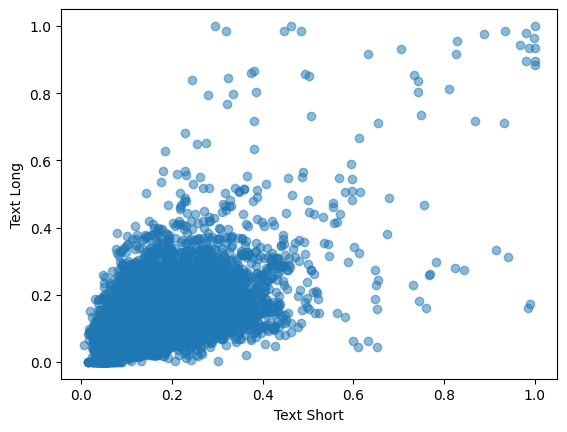

In [ ]:
plt.scatter(product_matrix_df['text_short'], product_matrix_df['text_long'], alpha=0.5)
plt.xlabel('Text Short')
plt.ylabel('Text Long')
plt.show()

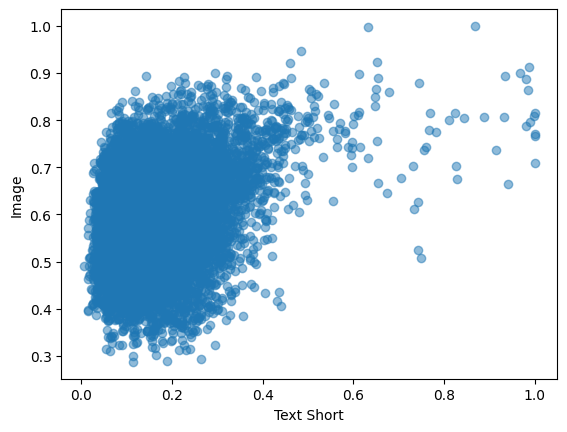

In [ ]:
plt.scatter(product_matrix_df['text_short'], product_matrix_df['image'], alpha=0.5)
plt.xlabel('Text Short')
plt.ylabel('Image')
plt.show()

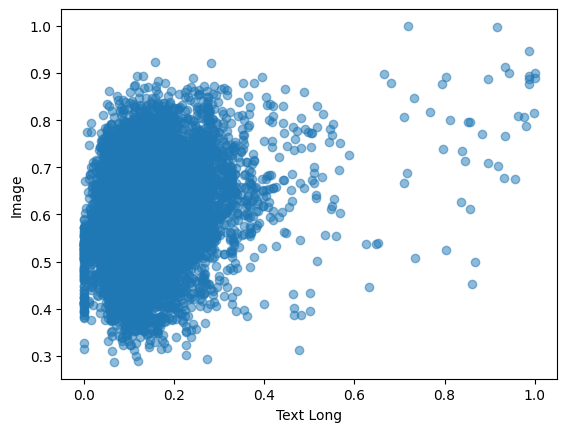

In [ ]:
plt.scatter(product_matrix_df['text_long'], product_matrix_df['image'], alpha=0.5)
plt.xlabel('Text Long')
plt.ylabel('Image')
plt.show()

<Axes: xlabel='image', ylabel='Density'>

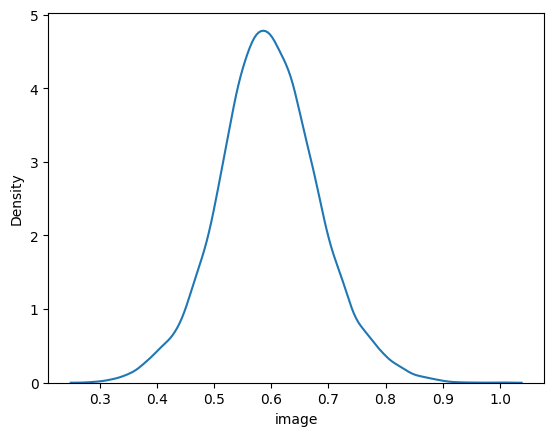

In [ ]:
sns.kdeplot(data=product_matrix_df, x='image')

<Axes: xlabel='text_long', ylabel='Density'>

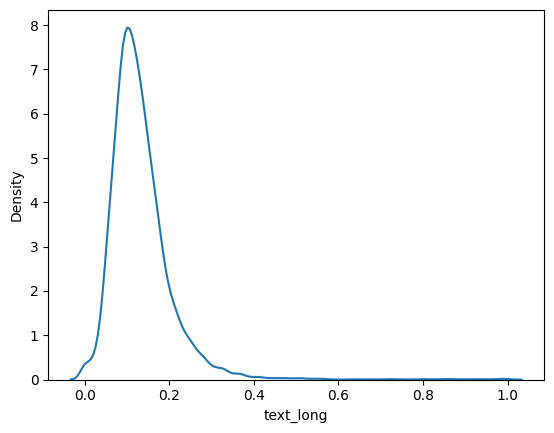

In [ ]:
sns.kdeplot(data=product_matrix_df, x='text_long')


<Axes: xlabel='text_short', ylabel='Density'>

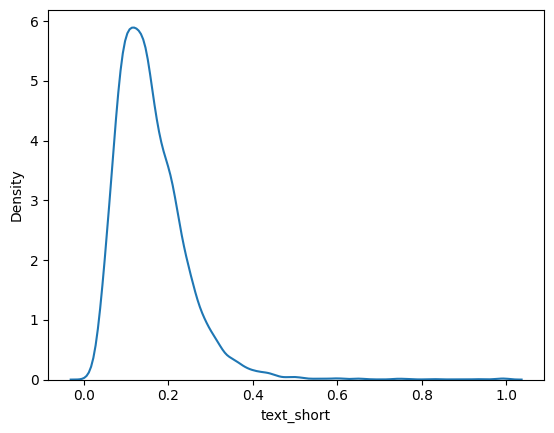

In [ ]:
sns.kdeplot(data=product_matrix_df, x='text_short')


In [ ]:
short_desc_similarity_score = short_desc_similarity_matrix[8, 116]
long_desc_similarity_score = long_desc_similarity_matrix[8, 116]

print(f"Similarity score between item {i} and item {j} (Short Description): {short_desc_similarity_score}")
print(f"Similarity score between item {i} and item {j} (Long Description): {long_desc_similarity_score}")

Similarity score between item 178 and item 178 (Short Description): 0.3800294335258633
Similarity score between item 178 and item 178 (Long Description): 0.6331363705043955


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Create an empty graph
G = nx.Graph()

# Create a dictionary to store similarity values for each pair of brands
brand_similarity = defaultdict(list)

new_df = df_bert[(df_bert['brand_1']!=df_bert['brand_2']) & (df_bert['brand_1'] =='Noahcam') | (df_bert['brand_2'] =='Noahcam')].iloc[:50, :]
# Iterate through the dataset and collect similarity values for each pair of brands

for _, row in new_df.iterrows():
    if row['brand_2'] == row['brand_2'] and (row['brand_1'] =='Noahcam' or row['brand_2'] =='Noahcam'):
        similarity = row[similarity]  # You can use any similarity measure here

        # Add similarity value to the list for the pair of brands
        brand_similarity[(row['brand_1'], row['brand_2'])].append(similarity)

# Compute the average similarity for each pair of brands
average_similarity = {pair: round(sum(similarities) / len(similarities),3) for pair, similarities in brand_similarity.items()}

# # Add nodes to the graph for each unique brand
# unique_brands = set(new_df['brand_1'].unique()) | set(new_df['brand_2'].unique())
# for brand in unique_brands:
#     G.add_node(brand)

# Add edges to the graph with average similarity as edge weight
for (brand_1, brand_2), similarity in average_similarity.items():

    if similarity > 0.95:
        G.add_node(brand_1)
        G.add_node(brand_2)
        print(similarity)
        G.add_edge(brand_1, brand_2, label=similarity)

# Draw the network graph
# pos = nx.spring_layout(G, seed=42)  # Define layout for the graph
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=5, font_weight='bold')
# edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

# # Display the graph
# plt.title('Network Graph of Similar Brands (Average Similarity)')
# plt.show()


0.979
0.985
0.983
0.977
0.98
0.968
0.969
0.956
0.962
0.958
0.969
0.96
0.973
0.966
0.977
0.98
0.967
0.972
0.978
0.957


In [ ]:
df.iloc[[8, 116]]['url'][116]

KeyError: 'url'

In [ ]:
df[df['id']=='B0BVQMLJCM']

In [ ]:
df[df['id']=='B08GHX9G5L']

In [ ]:
pip install seaborn

In [ ]:
# Flatten the dense similarity matrix to a 1D array
flat_short_desc_similarity = short_desc_similarity_matrix_dense.flatten()
flat_long_desc_similarity = long_desc_similarity_matrix_dense.flatten()

# Create histograms for short and long descriptions
plt.figure(figsize=(12, 6))

# Plot for short descriptions
plt.hist(flat_short_desc_similarity, bins=30, color='blue', alpha=0.7, label='Short Descriptions')
# Plot for long descriptions
plt.hist(flat_long_desc_similarity, bins=30, color='orange', alpha=0.7, label='Long Descriptions')

plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Items')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Assuming you have the similarity scores in a 2D list
product_names = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F', 'Product G', 'Product H', 'Product I', 'Product J']
similarity_scores = [
    [1.0, 0.85, 0.78, 0.88, 0.95, 0.72, 0.89, 0.91, 0.84, 0.93],  # Similarity scores for Product A
    [0.85, 1.0, 0.82, 0.79, 0.88, 0.75, 0.91, 0.86, 0.79, 0.89],  # Similarity scores for Product B
    [0.78, 0.82, 1.0, 0.88, 0.84, 0.80, 0.92, 0.81, 0.87, 0.85],  # Similarity scores for Product C
    [0.88, 0.79, 0.88, 1.0, 0.91, 0.84, 0.89, 0.95, 0.90, 0.92],  # Similarity scores for Product D
    [0.95, 0.88, 0.84, 0.91, 1.0, 0.82, 0.94, 0.97, 0.93, 0.98],  # Similarity scores for Product E
    [0.72, 0.75, 0.80, 0.84, 0.82, 1.0, 0.76, 0.73, 0.78, 0.79],  # Similarity scores for Product F
    [0.89, 0.91, 0.92, 0.89, 0.94, 0.76, 1.0, 0.88, 0.93, 0.90],  # Similarity scores for Product G
    [0.91, 0.86, 0.81, 0.95, 0.97, 0.73, 0.88, 1.0, 0.92, 0.96],  # Similarity scores for Product H
    [0.84, 0.79, 0.87, 0.90, 0.93, 0.78, 0.93, 0.92, 1.0, 0.91],  # Similarity scores for Product I
    [0.93, 0.89, 0.85, 0.92, 0.98, 0.79, 0.90, 0.96, 0.91, 1.0]   # Similarity scores for Product J
]

# Create a DataFrame
df_similarity = pd.DataFrame(similarity_scores, columns=product_names, index=product_names)

# Display the DataFrame
print(df_similarity)


In [ ]:
import pandas as pd

# Assuming you have short_desc_similarity_matrix and long_desc_similarity_matrix already calculated

# Initialize an empty list to store the data
data = []

# Iterate over pairs of items and store the data
num_items = len(df)

for i in range(num_items):
    for j in range(i + 1, num_items):
        short_desc_similarity_score = short_desc_similarity_matrix[i, j]
        long_desc_similarity_score = long_desc_similarity_matrix[i, j]

        # Append data as a tuple
        data.append((f"Item {i} - Item {j}", short_desc_similarity_score, long_desc_similarity_score))

# Create a DataFrame from the list of tuples
columns = ['Product Pair', 'Short Desc Similarity', 'Long Desc Similarity']
df_similarity = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df_similarity)